In [2]:
from qiskit import __version__
print(__version__)

2.1.1


In [3]:
from platform import python_version
print(python_version())

3.10.12


In [1]:
#%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


In [4]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")


Qiskit version: 2.1.1
Grader version: 0.22.12


In [19]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "bPv6pz30z1Ukhl_EqOtNh7GRGX_NMYcehiSUa8k5l7zE"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/8e87a80e0177462cb9b2a239bb1bd33a:35423a8d-125a-452b-a7e4-8882cb3069b3::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [20]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'bPv6pz30z1Ukhl_EqOtNh7GRGX_NMYcehiSUa8k5l7zE',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/8e87a80e0177462cb9b2a239bb1bd33a:35423a8d-125a-452b-a7e4-8882cb3069b3::',
  'verify': True,
  'private_endpoint': False}}

In [8]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

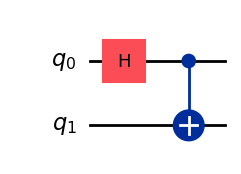

In [9]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")


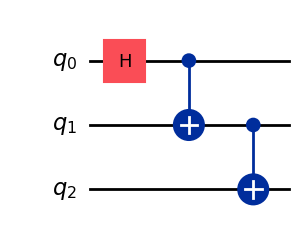

In [10]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0,1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1,2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [11]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


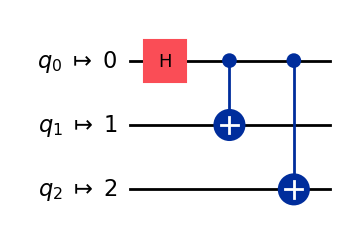

In [29]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import CouplingMap
from qiskit import QuantumCircuit

### WRITE YOUR CODE BELOW HERE ###

# Example quantum circuit (if not already defined)
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

# Define the coupling map as a list of connected qubit pairs
coupling_map = [[0, 1], [0, 2]]

# Create a CouplingMap object
coupling = CouplingMap(couplinglist=coupling_map)

# Transpile using the generate_preset_pass_manager function
pm = generate_preset_pass_manager(3, coupling_map=coupling)

### YOUR CODE FINISHES HERE ###

# Apply the transpilation
qc_transpiled = pm.run(qc)

# Draw the transpiled circuit
qc_transpiled.draw("mpl")


In [30]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [21]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [22]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 1024}


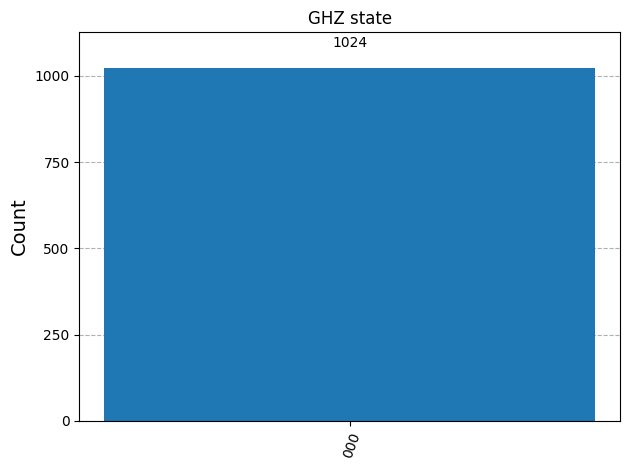

In [23]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(1.0)), ('ZZX', np.float64(0.0380859375)), ('ZII', np.float64(1.0)), ('XXI', np.float64(0.017578125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


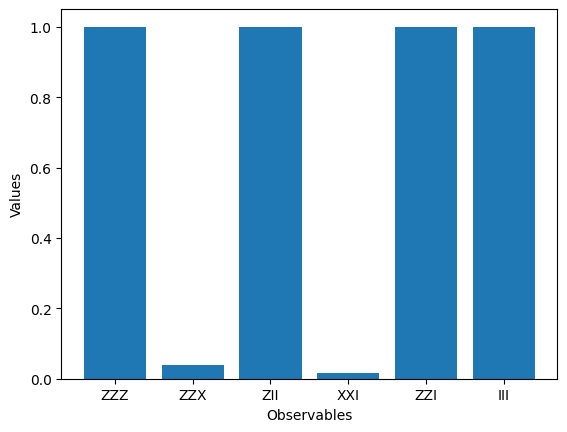

In [24]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [31]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")


Lab 0: 2/2 exercises completed (100%)
    ✅ 1875 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 1179 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 444 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [26]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_torino quantum computer


In [27]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Step 2. Optimize
pm = 
qc_transpiled = 

SyntaxError: invalid syntax (1099656048.py, line 6)

In [ ]:


# Step 3. Execute
sampler = 
job = 



In [ ]:
# Step 4. Post-process
results = 
counts_list = 
### YOUR CODE FINISHES HERE    ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')